<section id="top">
    <h1>This notebook covers the following sections:</h1>
</section>

<ol>
    <li>
        <a href="#one">An end-to-end Scikit-Learn worfklow</a>
    </li>
    <li>
        <a href="#two">Getting the data ready</a>
    </li>
    <li>
        <a href="#three">Choosing the right maching learning estimator/aglorithm/model for your problem</a>
    </li>
    <li>
        <a href="#four">Fitting your chosen machine learning model to data and using it to make a prediction</a>
    </li>
    <li>
        <a href="#five">Evaluting a machine learning model</a>
    </li>
    <li>
        <a href="#six">Improving predictions through experimentation (hyperparameter tuning)</a>
    </li>
    <li>
        <a href="#save-model">Saving and loading a pretrained model</a>
    </li>
    <li>
        <a href="#eight">Putting it all together in a pipeline</a>
    </li>
</ol>

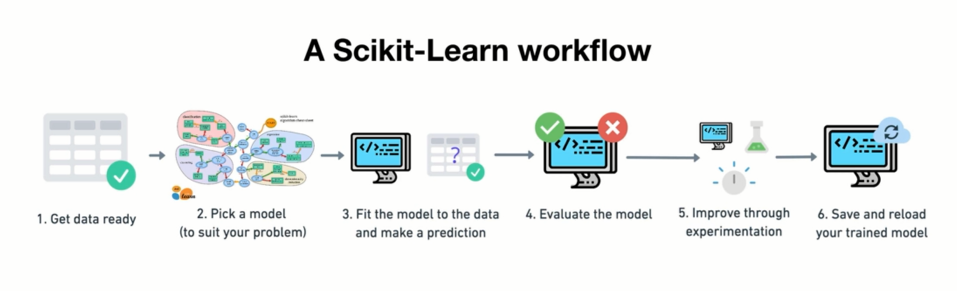

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use("default")

In [16]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
executable: C:\Users\user\Anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 19.2.3
   setuptools: 41.4.0
      sklearn: 0.23.2
        numpy: 1.16.5
        scipy: 1.3.1
       Cython: 0.29.13
       pandas: 0.25.1
   matplotlib: 3.1.1
       joblib: 0.13.2
threadpoolctl: 2.1.0

Built with OpenMP: True


<section id="one">
    <h2>An end-to-end Scikit-Learn worfklow</h2>
</section>

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2. Chose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True)

In [7]:
clf.fit(X_train, y_train);

In [8]:
# make a prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
# Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8524590163934426

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
confusion_matrix(y_test, y_pred)

array([[23,  4],
       [ 5, 29]], dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.8524590163934426

In [22]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(0)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimator. .. ...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%\n")

Trying model with 10 estimator. .. ...
Model accuracy on test set: 88.52%

Trying model with 20 estimator. .. ...
Model accuracy on test set: 78.69%

Trying model with 30 estimator. .. ...
Model accuracy on test set: 85.25%

Trying model with 40 estimator. .. ...
Model accuracy on test set: 86.89%

Trying model with 50 estimator. .. ...
Model accuracy on test set: 83.61%

Trying model with 60 estimator. .. ...
Model accuracy on test set: 85.25%

Trying model with 70 estimator. .. ...
Model accuracy on test set: 86.89%

Trying model with 80 estimator. .. ...
Model accuracy on test set: 83.61%

Trying model with 90 estimator. .. ...
Model accuracy on test set: 83.61%



<section id="save-model">
    <h3>1.7: Saving and loading a pretrained model</h3>
<section>

In [14]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

# Tutorial - 2

### 1. Make Sure all data is numerical

In [32]:
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
#This will give error because our Make and Colour columns are not numerical

ValueError: could not convert string to float: 'Nissan'

In [44]:
print(car_sales["Make"].value_counts(), "\n")
print(car_sales["Colour"].value_counts(), "\n")
print(car_sales["Doors"].value_counts())

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64 

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64 

4    856
5     79
3     65
Name: Doors, dtype: int64


In [46]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
X.head(3)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4


In [48]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [52]:
dummies = pd.get_dummies(X[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [51]:
# Alternative
dummies = pd.get_dummies(X, columns=["Make", "Colour", "Doors"])
dummies.head()

,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,0,0,1,0,0,1,0,0,0,1,0,0


In [53]:
# Let's refit the model
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
model.score(X_test, y_test)

0.2819539684271627

### 2. What if there were missing datas?

1. Fill them with some value(also known as imputation)
2. Remove the sample with missing values alltogether

In [3]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [4]:
# isna -> is NaN?
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [7]:
# Turn categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Make", "Colour", "Doors"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                   one_hot,
#                                   categorical_features)],
#                                   remainder="passthrough")

# transformed_X = transformer.fit_transform(X)
# transformed_X
# This will give error beacuse Input contains NaN

##### Option 1: Fill missing data with Pandas

Filling data is not a perfect practice

In [10]:
car_sales_missing["Doors"].value_counts()

4.0    861
5.0     75
3.0     64
Name: Doors, dtype: int64

In [8]:
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)
# why we filled Doors column with 4?
# if we use car_sales_missing["Doors"].value_counts()
# we'll see the majority has 4 doors

In [9]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

##### remove rows with missing Price value

In [11]:
car_sales_missing.dropna(inplace=True)

In [12]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [13]:
len(car_sales_missing)

950

In [14]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [16]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with scikit-learn

In [19]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [20]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
# Drop the rows of Price column that has no data
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

**Note:** We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
car_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
car_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", car_imputer, car_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Toyota', 'White', 4.0, 210193.0],
       ['Nissan', 'White', 3.0, 130127.30351906158],
       ['BMW', 'Black', 5.0, 181572.0],
       ...,
       ['BMW', 'missing', 3.0, 33320.0],
       ['Honda', 'White', 4.0, 130494.0],
       ['BMW', 'White', 3.0, 57905.0]], dtype=object)

In [25]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [26]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.10193000e+05],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.30127304e+05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.81572000e+05],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.33200000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.30494000e+05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.79050000e+04]])

In [27]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.26958858126280894

<section id="three">
    <h2>3. Choosing the right maching learning estimator/aglorithm/model for your problem</h2>
</section>

<a href="#top">top</a>

- Classification - predicting whether a smaple is one thing or not
- Regression - predicting a number

 [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

#### 3.1 Picking a machine learning model for a regression problem

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

[scikit-learn boston housing dataset from documentation](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
boston_df["target"] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


![model-select](model-select1.JPG)

1. `>50 samples`? **yes**
2. `target` is `categorical`? **no**
3. `<100k` samples? **yes**
4. `few features should be important`? We don't know. let's choose **No**
5. So preferred model is [`RidgeRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

In [32]:
from sklearn.linear_model import Ridge

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6789748327846079

Our `score` is pretty low. How can we improve our model? let's go to the [`picture`](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html "visit website for details") again

![model-select](model-select1.JPG)

6. `RidgeRegression` **not working**. Then go to the next model [`EnsembleRegressor`](https://scikit-learn.org/stable/modules/ensemble.html) 

In [6]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

### Let's work with a classification problem

In [7]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


![classification](classification.JPG)

1. `>50 samples`? **yes**
2. `categorical`? heart disease or not, obviously **yes**
3. `labeled`? **yes**
4. `<100k samples`? **yes**
5. `LinearSVC`

In [38]:
from sklearn.svm import LinearSVC

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6973684210526315

In [40]:
from sklearn.neighbors import KNeighborsClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6973684210526315

In [4]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8026315789473685

A little tidbit for modelling in machine learning is:

- If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
- If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

<section id="four">
    <h2>Fit the model to data and using it to make predictions</h2>
</section>
<a href="#top">top</a>

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

#### We'll see three ways of finding accuracy score

In [7]:
clf.score(X_test, y_test)

0.8688524590163934

In [8]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

Let's see what is `predict_proba()`

In [11]:
clf.predict_proba(X_test[:5])
#returns probabilities for target values

array([[0.82, 0.18],
       [0.32, 0.68],
       [0.32, 0.68],
       [0.99, 0.01],
       [0.82, 0.18]])

In [12]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 0], dtype=int64)

<section id="five">
    <h2>5. Evaluating a machine learning model</h2>
</section>
<a href="#top">top</a>

In [29]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
clf.score(X_train, y_train)

1.0

In [30]:
clf.score(X_test, y_test)

0.8289473684210527

##### Let's do the same for regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8471696005277883

##### score of both models is pretty close. But how do the do it behind the screen!

#### 5.1: Evaluating a model  using the score parameter

[see sklearn documentaion](https://scikit-learn.org/stable/modules/model_evaluation.html)
![Evaluation](evaluation.JPG)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [11]:
clf.score(X_test, y_test)

0.8524590163934426

In [15]:
print(cross_val_score(clf, X, y, cv=5))
cross_val_score(clf, X, y, cv=10)

[0.85245902 0.8852459  0.80327869 0.83333333 0.75      ]


array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.86666667, 0.73333333, 0.83333333])

In [13]:
# compare our single score and cross validation score
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 5.2: Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [43]:
np.mean(cross_val_score)

0.8248087431693989

In [45]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier cross-validated accuracy: 82.48%


##### Confusion matrix

![confusion](confusion.JPG)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train);

In [49]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [51]:
pd.crosstab(y_test, y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


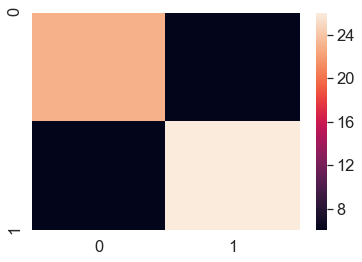

In [52]:
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

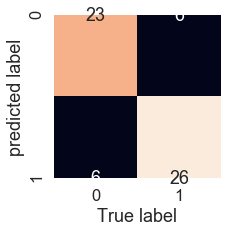

In [53]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
    
plot_conf_mat(conf_mat)

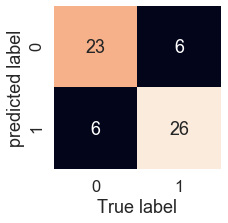

In [56]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
    # Fix the broken annotations
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    
plot_conf_mat(conf_mat)